In [2]:
import numpy as np

import pandas as pd

from collections import OrderedDict

from sklearn.preprocessing import StandardScaler

# 분류기 

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

# 측정

from sklearn.metrics import accuracy_score

In [3]:
import seaborn as sns

import matplotlib

df=pd.read_csv("Case5_multi.csv",sep=",",index_col=0)

df1=pd.read_csv("Case5_test.csv",sep=",",index_col=0)

# %matplotlib inline

# sns.set(color_codes=True)

# pal = sns.color_palette("Set2", 10)

# sns.set_palette(pal)

# df.columns, df.shape


In [4]:
## 더미변수화 하기
df2 = df.append(df1)
df2 = pd.get_dummies(df2, drop_first=True, columns=['Sex','MaritalStatus','BedCategory','Department','InsPayorcategory'])

## 수치형 변수들 스케일링 해주기 - Standardization 표준화

scale = StandardScaler().fit(df[['AgeYrs','Estimatedcost']])

df, df1 = df2.loc[:4989,:], df2.loc[4989:,:]

df[['AgeYrs','Estimatedcost']] = scale.transform(df[['AgeYrs','Estimatedcost']])
df1[['AgeYrs','Estimatedcost']] = scale.transform(df1[['AgeYrs','Estimatedcost']])

Target = df.NPS_Status

features = df.drop(['HospitalNo2','AdmissionDate','DischargeDate','NPS_Status','CE_NPS','State','Country','STATEZONE'],axis=1)
    
Target_test = df1.NPS_Status

features_test = df1.drop(['HospitalNo2','AdmissionDate','DischargeDate','NPS_Status','CE_NPS','State','Country','STATEZONE'],axis=1)

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:

# df1.head()

In [5]:



X_train, y_train = features,Target

X_test, y_test = features_test,Target_test

MLres = {}

def Mlresult(model, score):

    MLres[model] = score

    print(MLres)

    

roc_curve_data = {}

def Rocdata(algoname, fpr, tpr, auc):

    data = [fpr,tpr,auc]

    roc_curve_data[algoname] = data


In [ ]:
# Logistic Regression (로지스틱 회귀)

logi_reg = LogisticRegression()

logi_reg.fit(X_train, y_train)

y_pred = logi_reg.predict(X_test)

# score

accuracy = logi_reg.score(X_test,y_test)

Mlresult('Logistic Regression', accuracy)

logi_reg.coef_

In [ ]:
# Random Forest Classifier 

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

accuracy = rfc.score(X_test,y_test)

Mlresult("RandomForestClassifier",accuracy)

# f,ax=plt.subplots(2,2,figsize=(15,12))
# model=RandomForestClassifier(n_estimators=500,random_state=0)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
# ax[0,0].set_title('Feature Importance in Random Forests')

In [ ]:
# 중요변수 파악하기
import matplotlib.pyplot as plt

def FeaturesImportance(data,model):

    features = data.columns.tolist()

    fi = model.feature_importances_

    sorted_features = {}

    for feature, imp in zip(features,fi):

        sorted_features[feature] = round(imp,3)

    sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key =lambda t: t[1]))                                  

    dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features','Importance'])                           

    plt.figure(figsize=(30,5))

    sns.barplot(x="Features", y='Importance', data=dfvi);

    plt.xticks(rotation=90)

    plt.show()        

 

FeaturesImportance(features,rfc)

In [ ]:
# Support Vector Machine (SVM)

svm = SVC(kernel="linear", probability = True)

svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

accuracy = svm.score(X_test,y_test)

Mlresult("SVC_linear",accuracy)

In [ ]:
res = pd.DataFrame({'Model': ['Logistic Regression','RandomForestClassifier','SVC'],

                    'Score': [0.6520547945205479,0.6821917808219178,0.6712328767123288]})

res

In [ ]:

# 결과치 비교 그래프

plt.figure(figsize=(8,5))

sns.barplot(x='Score',y='Model', data = res)

plt.xticks(rotation=90)

plt.xlim([0.4,0.8])

plt.show()

In [ ]:
len(pd.unique(df1['HospitalNo2']))

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('svm', svm), ('rf', rfc), ('log_reg', logi_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
class_names=df.NPS_Status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# model=DecisionTreeClassifier()
# model.fit(X_train,y_train)
# pred=model.predict(X_test)
# accuracy=model.score(X_test,y_test)
# Mlresult("DecisionTree",accuracy)

In [ ]:
svm = SVC(kernel="linear", probability = True)

svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

accuracy = svm.score(X_test,y_test)

Mlresult("SVC_linear",accuracy)

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
accuracy=model.score(X_test,y_test)
Mlresult("KNeighbors",accuracy)

In [ ]:
model=GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)
accuracy=model.score(X_test,y_test)
Mlresult("GaussianNB",accuracy)

In [ ]:
res = pd.DataFrame({'Model': ['Logistic Regression','RandomForestClassifier','SVC_rbf','SVC_linear','DecisionTree','KNeighbors','GaussianNB'],

                    'Score': [0.6520547945205479,0.6821917808219178,0.6712328767123288,0.6410958904109589,0.5753424657534246,0.6082191780821918,0.30684931506849317]})

res

In [ ]:
# 결과치 비교 그래프

plt.figure(figsize=(8,5))

sns.barplot(x='Score',y='Model', data = res)

plt.xticks(rotation=90)

plt.xlim([0,0.8])

plt.show()

In [1]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))


NameError: name 'KNeighborsClassifier' is not defined

In [7]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.6547945205479452


NameError: name 'cross_val_score' is not defined

In [8]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))

MemoryError: 

In [9]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
ada.fit(X_train,y_train)
prediction=ada.predict(X_test)
print('The accuracy for adaboost is:',metrics.accuracy_score(prediction,y_test))

The accuracy for adaboost is: 0.6876712328767123


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
grad.fit(X_train,y_train)
prediction=grad.predict(X_test)
print('The accuracy for gradient boosting is:',metrics.accuracy_score(prediction,y_test))

MemoryError: 

In [14]:
import xgboost as xg
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for xgboost is:',metrics.accuracy_score(prediction,y_test))

ModuleNotFoundError: No module named 'xgboost'

IndexError: too many indices for array

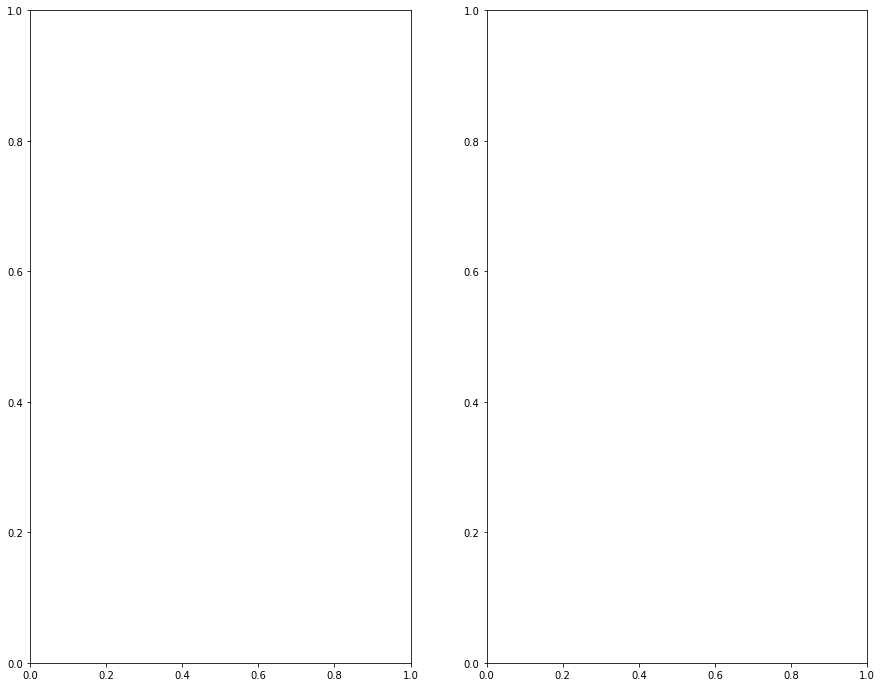

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

plt.show()